<a href="https://colab.research.google.com/github/sultanmr/Supervised_learning_project/blob/main/supervised_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 100)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# utility
from pprint import pprint
import time


from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
data = pd.read_csv('Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.drop_duplicates().shape

(7043, 21)

In [ ]:
train, test = train_test_split(data,
                               test_size = 0.12,
                               stratify = data['Churn'],
                               random_state = 19)
print(train.shape)
print(test.shape)

(6197, 21)
(846, 21)


In [ ]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,6197.00000,6197.000000,6197.000000
mean,0.16395,32.302404,64.906487
std,0.37026,24.521414,30.001678
min,0.00000,0.000000,18.250000
25%,0.00000,9.000000,36.050000
50%,0.00000,29.000000,70.350000
75%,0.00000,55.000000,89.950000
max,1.00000,72.000000,118.750000


In [ ]:
train['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5181
1,1016


In [ ]:
train['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73471
Yes,0.26529


In [ ]:
train['customerID'].value_counts()

,count
customerID,
3387-PLKUI,1
9773-PEQBZ,1
9720-JJJOR,1
9938-ZREHM,1
1089-XZWHH,1
...,...
5642-MHDQT,1
4659-NZRUF,1
2911-IJORQ,1


In [ ]:
num_features = ['tenure','MonthlyCharges']
cat_features = [col for col in train.columns if col not in ['Churn','customerID']+num_features]

In [ ]:
pprint(cat_features)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']


In [ ]:
for col in cat_features:
  print(f'{col}: {train[col].nunique()}')

gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
TotalCharges: 5797


In [ ]:
train['TotalCharges']

,TotalCharges
6072,251.25
624,137.6
2521,3132.75
2996,1156.35
2378,2416.55
...,...
5965,2188.5
3731,146.65
2380,5969.95
3767,8240.85


In [ ]:
#train['TotalCharges'].astype(float)

In [ ]:
train.loc[train['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


In [ ]:
test.loc[test['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No


In [ ]:
missing_indices_train = train.loc[train['TotalCharges']==' '].index
missing_indices_test = test.loc[test['TotalCharges']==' '].index

In [ ]:
missing_indices_test

Index([1082, 936], dtype='int64')

In [ ]:
median_value = train.loc[~train.index.isin(missing_indices_train),'TotalCharges'].astype(float).median()

In [ ]:
median_value

1400.6999999999998

In [ ]:
train.loc[missing_indices_train, 'TotalCharges'] = median_value
test.loc[missing_indices_test, 'TotalCharges'] = median_value

In [ ]:
train['TotalCharges'] = train['TotalCharges'].astype(float)
test['TotalCharges'] = test['TotalCharges'].astype(float)

In [ ]:
num_features = num_features + ['TotalCharges']
num_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [ ]:
cat_features = [col for col in train.columns if col not in ['Churn','customerID']+num_features]
cat_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

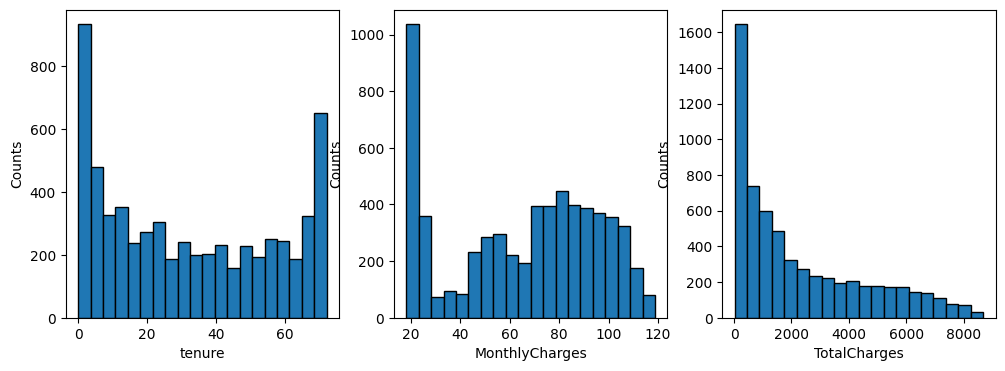

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (12, 4))
axs = axs.flatten()

for i, col in enumerate(num_features):
  axs[i].hist(train[col], bins = 20, edgecolor = 'black')
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('Counts')

In [ ]:
len(cat_features)

16

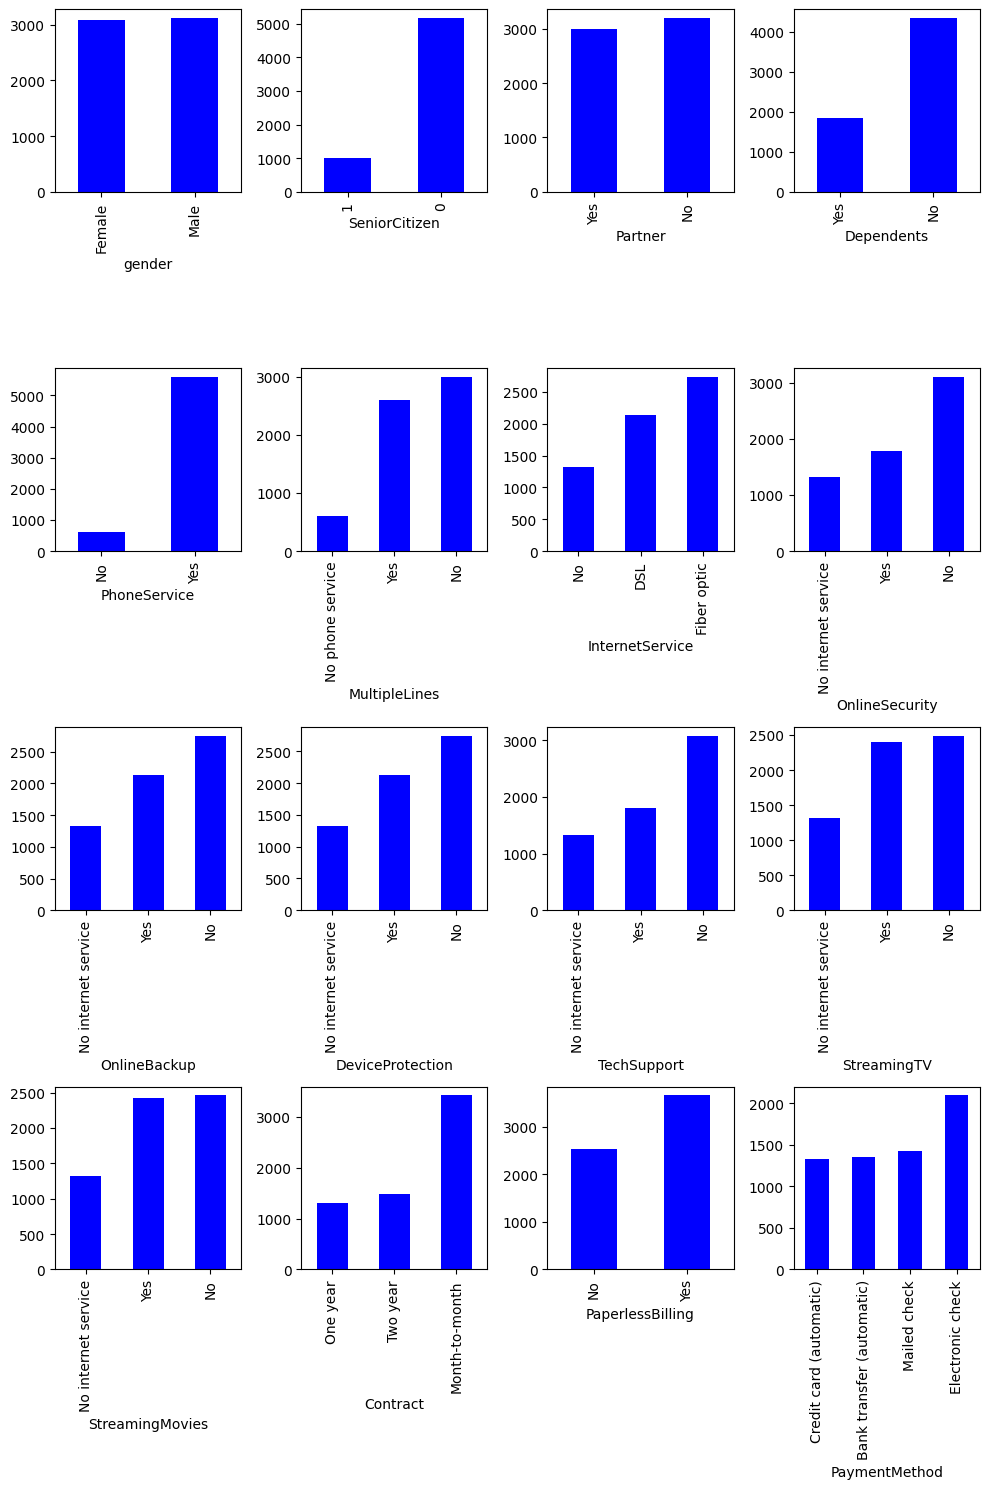

In [ ]:
fig, axs = plt.subplots(4,4, figsize = (10,15))
axs = axs.flatten()

for i, col in enumerate(cat_features):
  train[col].value_counts(ascending=True).plot(kind = 'bar', color='blue', ax = axs[i])

plt.tight_layout()

In [ ]:
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6072,3387-PLKUI,Female,0,Yes,Yes,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.80,251.25,No
624,1009-IRMNA,Female,0,No,No,7,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,137.60,Yes
2521,5373-SFODM,Male,1,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.25,3132.75,Yes
2996,6620-JDYNW,Female,0,No,No,18,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,60.60,1156.35,No
2378,2884-GBPFB,Female,0,Yes,No,35,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,2416.55,Yes


In [ ]:
output_dic = {'Yes':1, 'No':0}

train['Churn_encoded']=train['Churn'].map(output_dic)
#test['Churn_encoded'] = test['Churn'].map(output_dic)

In [ ]:
def plotCorrelationMatrix(df, figsize = (5,5)):
  corr = df.corr()

  plt.figure(figsize = figsize)

  sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt = '.2f', annot_kws = {'size':10})

  plt.title('Correlation Matrix')
  plt.tight_layout()

  plt.show()

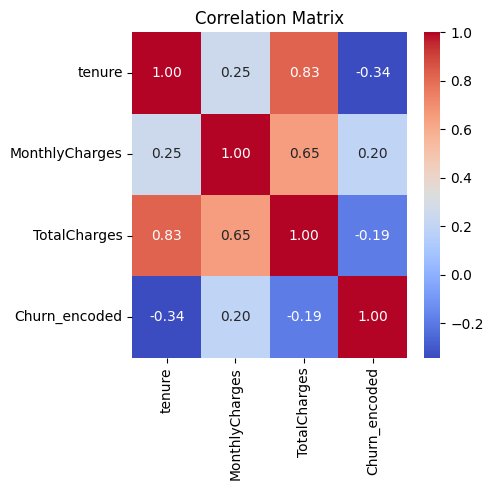

In [ ]:
plotCorrelationMatrix(train[num_features + ['Churn_encoded']])

In [ ]:
def one_hot_encode_cat_features(feautres, train, test):
  enc = OneHotEncoder(drop='if_binary',
                      sparse_output=False,
                      handle_unknown='ignore')
  enc.fit(train[feautres])

  train_enc = pd.DataFrame(data = enc.transform(train[feautres]),
                           columns = enc.get_feature_names_out(),
                           index = train.index)
  test_enc = pd.DataFrame(data = enc.transform(test[feautres]),
                           columns = enc.get_feature_names_out(),
                           index = test.index)

  train_enc = pd.concat([train.drop(feautres, axis=1), train_enc], axis=1)
  test_enc = pd.concat([test.drop(feautres, axis=1), test_enc], axis=1)

  return train_enc, test_enc

In [ ]:
train_enc, test_enc = one_hot_encode_cat_features(cat_features, train.copy(), test.copy())

train_enc.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Churn_encoded,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6072,3387-PLKUI,13,18.80,251.25,No,0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
624,1009-IRMNA,7,20.00,137.60,Yes,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2521,5373-SFODM,36,85.25,3132.75,Yes,1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2996,6620-JDYNW,18,60.60,1156.35,No,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2378,2884-GBPFB,35,70.30,2416.55,Yes,1,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
ohe_features = [col for col in train_enc.columns if col not in train.columns]
pprint(ohe_features)

['gender_Male',
 'SeniorCitizen_1',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']


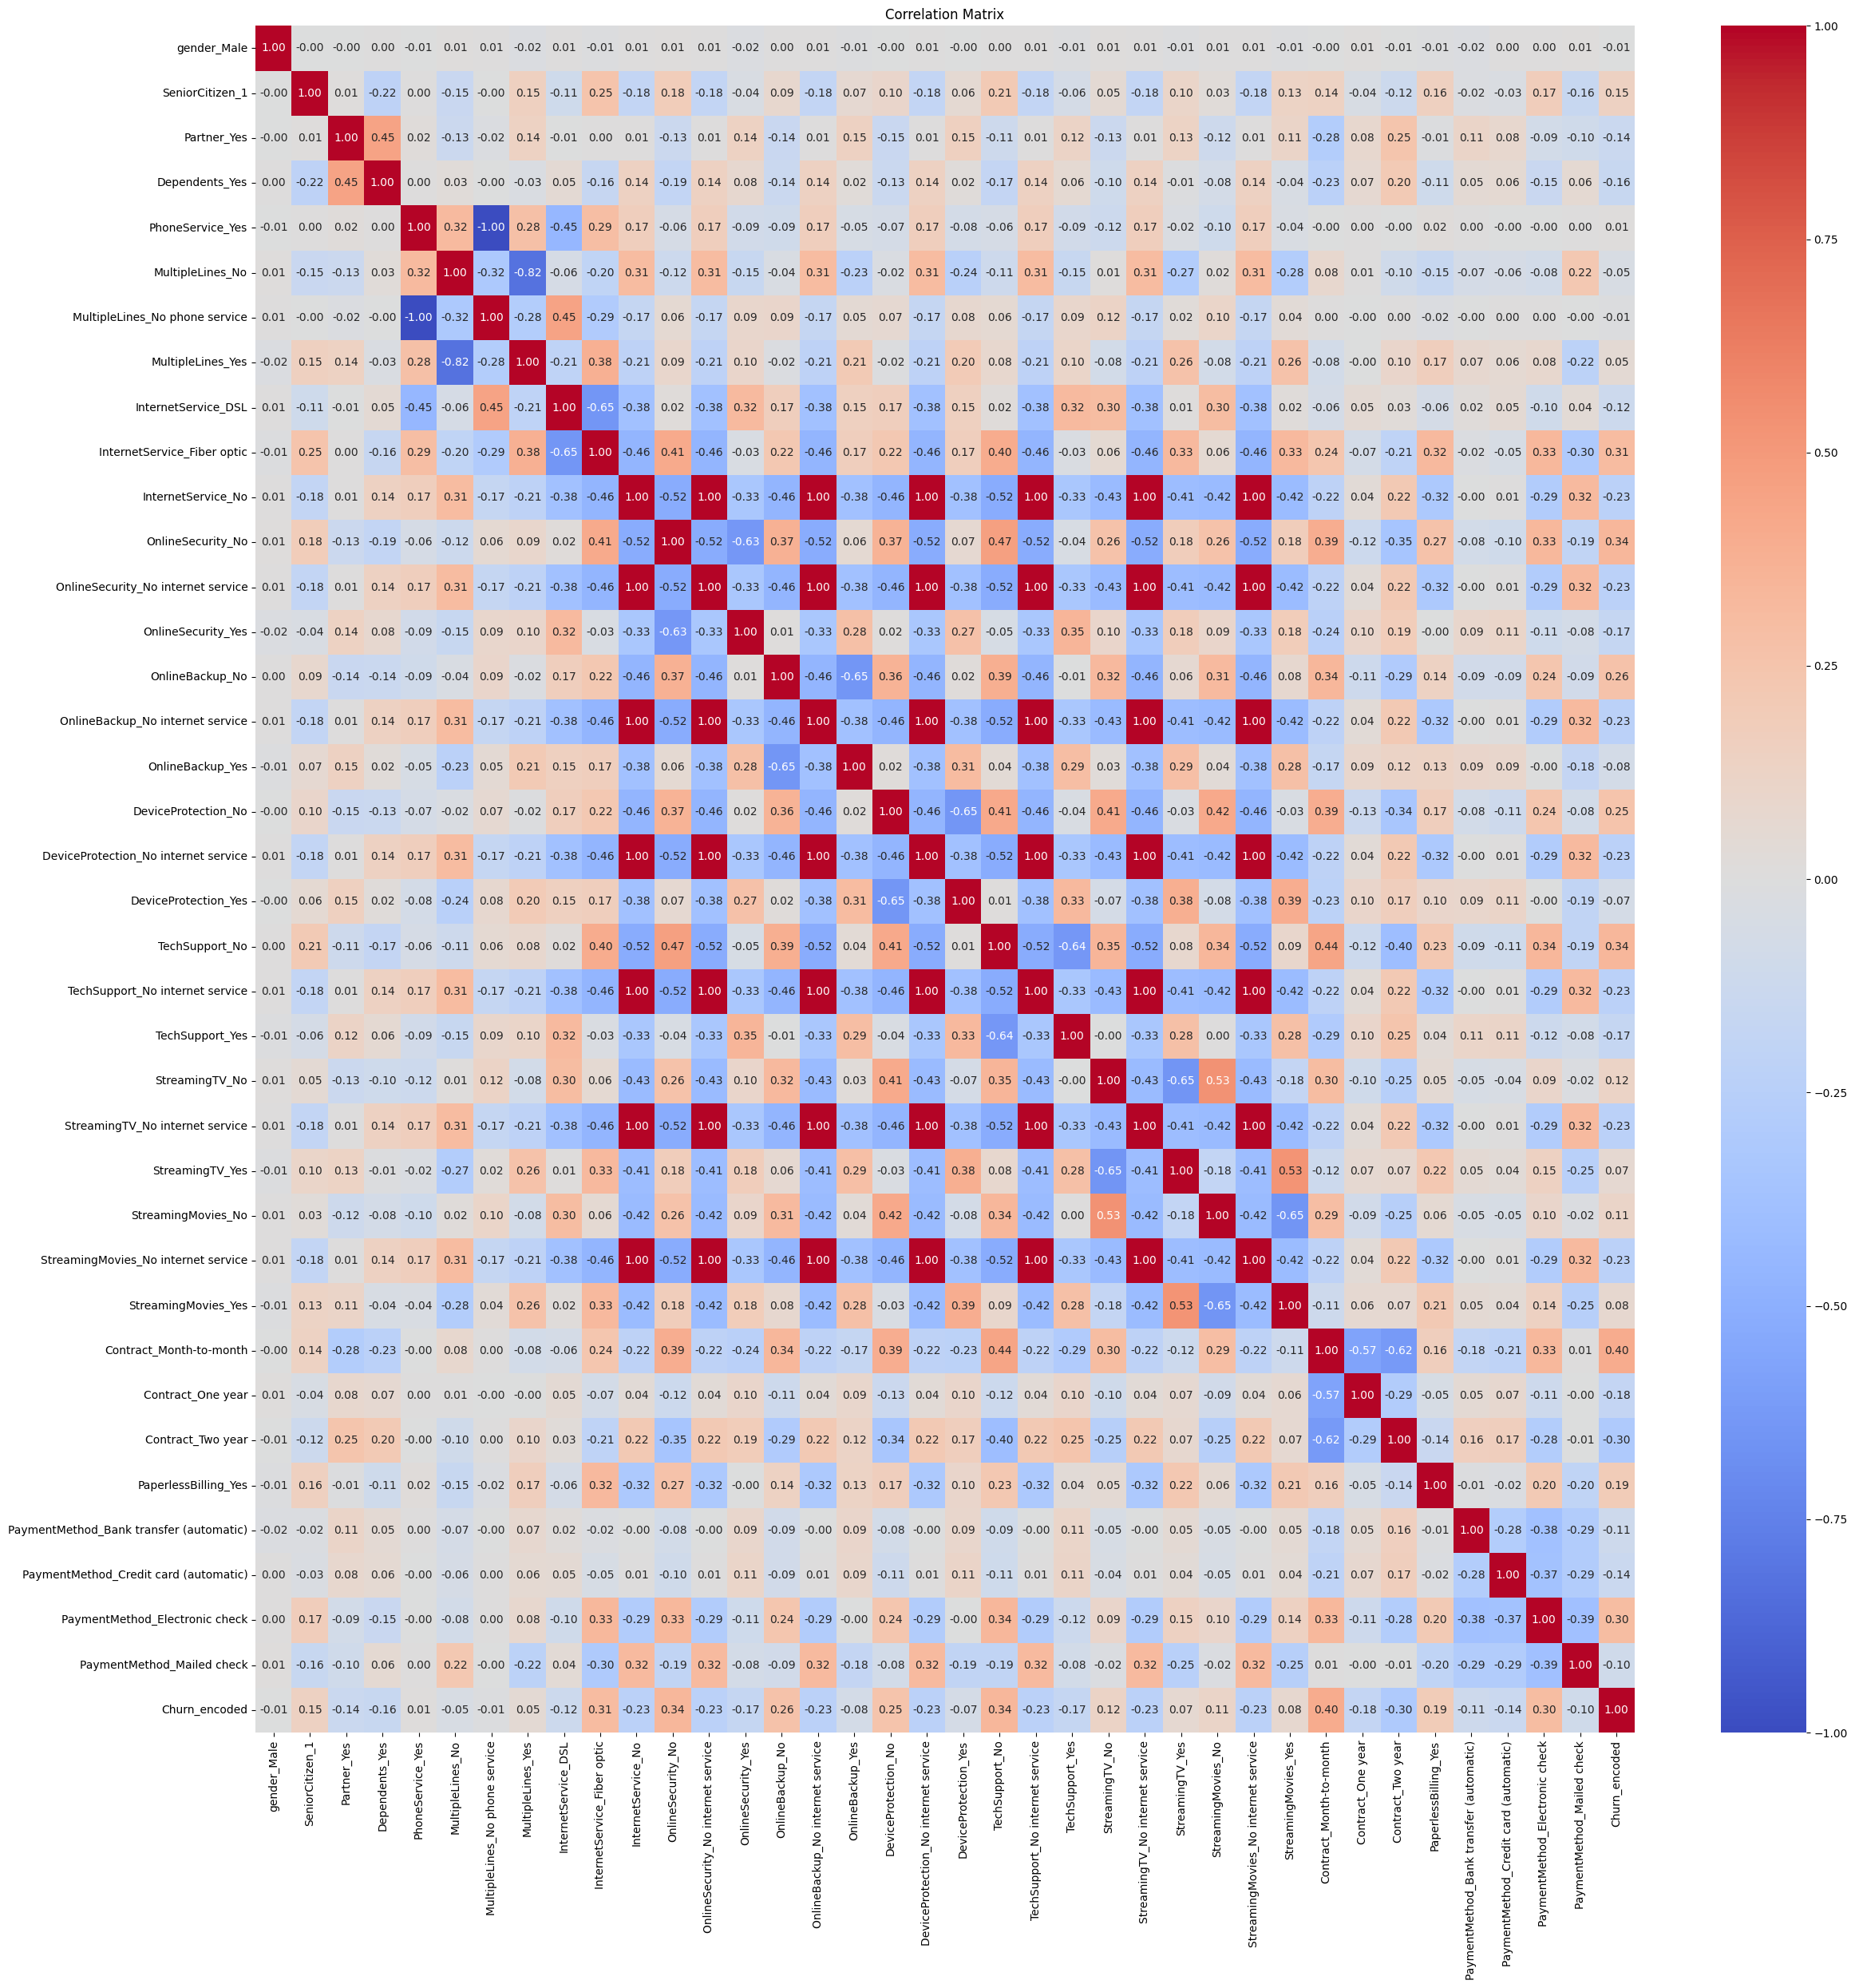

In [ ]:
plotCorrelationMatrix(train_enc[ohe_features+['Churn_encoded']],
                      figsize = (25,25))